In [ ]:
the data consists of different fleet service organisation which records the telematic details of the driver. along with
the telematic data we also had additional column added by princy for the part driver behaviour recognition, and hence added
simulated data consisting of colun such as Num_times_yawned, Num_times_Angry, Num_times_sleepy

first we analysed the data, perform data cleaning by removing NAN , either by replacing with aggreagation or by performing 
linear regression 

after which we performed clustering, we made use of kprototype which also considers categorical data 

we perform cluster analysis came up with following classes that defines the driver , the analysis was based on 
MAX_SPEED, NO_OF_HARSH_BRAKES, NO_OF_HARSH_ACCELERATION, NO_OF_SPEED_VIOLATIONS

Very Risky, Risky, Offensive, Defensive, Safe


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from datetime import datetime
from kmodes.kprototypes import KPrototypes
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

In [2]:
data = pd.read_csv('/Users/sk250120/Documents/practice_python_code/Final_code/Telematics-POC.csv')

### DATA EXPLORATION

In [3]:
data.head()

,MONTH_KEY,COMPANY_CODE,CUSTOMER_TRADING_NAME,ACCOUNT_NAME,COST_CENTRE_NAME,MAKE_DESCRIPTION,RANGE_DESCRIPTION,MODEL_DESCRIPTION,ENGINE_CAPACITY,FUEL_TYPE,...,DUE_TO_TERM,SPEED_PENALTY_POINTS,SPEEDING_TIME,SPEEDING_TIME_SECONDS,DRIVING_TIME,DRIVING_TIME_SECONDS,TM_SCORE,Num_times_yawned,Num_times_Angry,Num_times_sleepy
0,201601,KFS,KWANE FLEET SERVICES (PTY) LTD,KWANE FLEET SERVICES (PTY) LTD,KWANE CAPITAL,TOYOTA,COROLLA,1.6 PRESTIGE CVT,1598,PETROL,...,25/02/20,359,40:16.0,2416,08:48.0,720528,38.26494,5.0,10.0,9.0
1,201602,KFS,KWANE FLEET SERVICES (PTY) LTD,KWANE FLEET SERVICES (PTY) LTD,KWANE CAPITAL,TOYOTA,COROLLA,1.6 PRESTIGE CVT,1598,PETROL,...,25/02/20,0,00:00.0,0,46:00.0,9960,90.00000,9.0,11.0,10.0
2,201601,KFS,KWANE FLEET SERVICES (PTY) LTD,KWANE FLEET SERVICES (PTY) LTD,KWANE CAPITAL,ISUZU,KB,300 D-TEQ LX REGULAR CAB,2999,DIESEL,...,12/2/2020,376,41:46.0,2506,41:40.0,204100,55.65427,12.0,15.0,11.0
3,201603,KFS,KWANE FLEET SERVICES (PTY) LTD,KWANE FLEET SERVICES (PTY) LTD,KWANE CAPITAL,ISUZU,KB,300 D-TEQ LX REGULAR CAB,2999,DIESEL,...,12/2/2020,284,31:03.0,1863,07:12.0,184032,46.48293,7.0,10.0,9.0
4,201605,KFS,KWANE FLEET SERVICES (PTY) LTD,KWANE FLEET SERVICES (PTY) LTD,KWANE CAPITAL,ISUZU,KB,300 D-TEQ LX REGULAR CAB,2999,DIESEL,...,12/2/2020,1638,44:04.0,9844,12:04.0,220324,52.07689,6.0,6.0,8.0


In [4]:
data.shape

(24536, 49)

In [5]:
data.describe()

,MONTH_KEY,ENGINE_CAPACITY,FUEL_CONSUMPTION,NUMBER_OF_GEARS,TM_DRIVERID,MAX_SPEED,NO_OF_HARSH_BRAKES,NO_OF_HARSH_ACCELERATION,NO_OF_SPEED_VIOLATIONS,NO_EXCESS_IDLE,...,PROJECTED_EXCESS_KM_CHARGE,PAST_CONTRACT_KM,UNDER_UTILSED,SPEED_PENALTY_POINTS,SPEEDING_TIME_SECONDS,DRIVING_TIME_SECONDS,TM_SCORE,Num_times_yawned,Num_times_Angry,Num_times_sleepy
count,24536.000000,24536.000000,24536.000000,18656.000000,24536.000000,24536.000000,24536.000000,24536.000000,24536.000000,24536.000000,...,24536.000000,0.0,2383.0,24536.000000,24536.000000,2.453600e+04,24223.000000,24228.000000,24228.000000,24228.000000
mean,201621.301842,2254.616482,8.289960,5.219554,13965.302861,119.756847,13.872962,15.211078,149.802454,52.185075,...,2100.129063,NaN,1.0,297.393259,2301.430999,1.961368e+05,76.295974,8.509823,10.743190,10.231633
std,32.482645,1503.807917,4.390734,1.073067,22773.496255,34.194198,37.581739,43.651018,540.867398,218.338410,...,8954.198282,NaN,0.0,1320.617040,8190.338116,3.729941e+05,20.741318,7.315166,7.630804,7.573637
min,201601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,1.0,0.000000,0.000000,4.000000e+00,2.800638,0.000000,0.000000,0.000000
25%,201607.000000,1497.000000,6.600000,5.000000,2905.000000,103.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,1.0,0.000000,0.000000,3.432700e+04,58.563100,5.000000,7.000000,7.000000
50%,201609.000000,1987.000000,8.100000,5.000000,5539.000000,128.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,NaN,1.0,0.000000,10.000000,1.553420e+05,83.730340,8.000000,10.000000,10.000000
75%,201612.000000,2494.000000,8.700000,6.000000,6766.000000,141.000000,13.000000,13.000000,47.000000,15.000000,...,0.000000,NaN,1.0,68.000000,772.000000,2.884480e+05,94.144330,11.000000,13.000000,13.000000
max,201701.000000,15928.000000,52.000000,8.000000,65535.000000,250.000000,1303.000000,1394.000000,15990.000000,7088.000000,...,292810.520000,NaN,1.0,48673.000000,240782.000000,3.946534e+07,100.000000,100.000000,100.000000,100.000000


In [6]:
# Checking for the unique value present in each feature 
for i in data.columns:
    print(i,': ',len(data[i].unique()))

MONTH_KEY :  13
COMPANY_CODE :  7
CUSTOMER_TRADING_NAME :  148
ACCOUNT_NAME :  212
COST_CENTRE_NAME :  511
MAKE_DESCRIPTION :  37
RANGE_DESCRIPTION :  167
MODEL_DESCRIPTION :  504
ENGINE_CAPACITY :  138
FUEL_TYPE :  3
FUEL_CONSUMPTION :  113
NUMBER_OF_GEARS :  7
VEHICLE_TYPE_DESCRIPTION :  12
INSTALLATION_DATE :  682
PRODUCT_CODE :  3
TM_DRIVERID :  2353
TM_REGISTRATION_NUMBER :  2433
MAX_SPEED :  232
NO_OF_HARSH_BRAKES :  306
NO_OF_HARSH_ACCELERATION :  343
NO_OF_SPEED_VIOLATIONS :  1705
NO_EXCESS_IDLE :  940
NO_OF_TRIPS :  983
INSURANCE :  3
OTHER :  1
MAINTENANCE :  708
RENTAL :  2643
AVOIDABLES :  36
FAM :  133
ADHOC_RENTAL :  1
TRAFFIC_FINE :  39
FUEL :  7588
LICENSING :  9
SUNDRIES :  1
KM_DRIVEN :  18802
MONTHLY_KM_EXCEEDED :  1
PROJECTED_EXCESS_KM_CHARGE :  606
PAST_CONTRACT_KM :  1
UNDER_UTILSED :  2
DUE_TO_TERM :  920
SPEED_PENALTY_POINTS :  2309
SPEEDING_TIME :  3104
SPEEDING_TIME_SECONDS :  5464
DRIVING_TIME :  903
DRIVING_TIME_SECONDS :  20624
TM_SCORE :  15245
Num_times_y

In [7]:
#Checking for feature that has NA value along with the count
for i in data.columns:
    if(data[i].isna().sum()!=0):
        print(i,': ',data[i].isna().sum())

NUMBER_OF_GEARS :  5880
INSURANCE :  24534
OTHER :  24536
MAINTENANCE :  23576
RENTAL :  3825
AVOIDABLES :  24446
FAM :  24328
ADHOC_RENTAL :  24536
TRAFFIC_FINE :  24286
FUEL :  15072
LICENSING :  24527
SUNDRIES :  24536
MONTHLY_KM_EXCEEDED :  24536
PAST_CONTRACT_KM :  24536
UNDER_UTILSED :  22153
TM_SCORE :  313
Num_times_yawned :  308
Num_times_Angry :  308
Num_times_sleepy :  308


In [8]:
##removing features which has 90% na values
na_list=[]
for i in data.columns:
    if(data[i].isna().sum()!=0):
        percent = (np.round((data[i].isna().sum())/len(data),4))*100
        if(percent >=90):
            print(i,': ',percent)
            na_list.append(i)

data = data.drop(na_list, axis=1)

INSURANCE :  99.99
OTHER :  100.0
MAINTENANCE :  96.09
AVOIDABLES :  99.63
FAM :  99.15
ADHOC_RENTAL :  100.0
TRAFFIC_FINE :  98.98
LICENSING :  99.96000000000001
SUNDRIES :  100.0
MONTHLY_KM_EXCEEDED :  100.0
PAST_CONTRACT_KM :  100.0
UNDER_UTILSED :  90.29


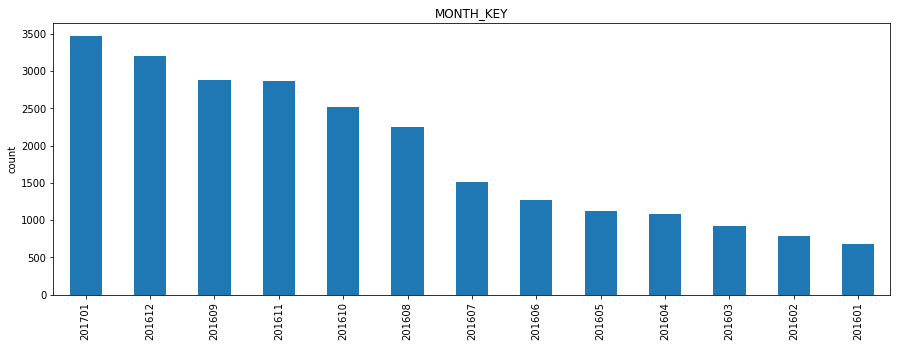

In [9]:
#visualising how month key distributed 
plt.figure(figsize=(15,5))
data.MONTH_KEY.value_counts().plot(kind = 'bar')
plt.title('MONTH_KEY')
plt.ylabel('count')
plt.show()

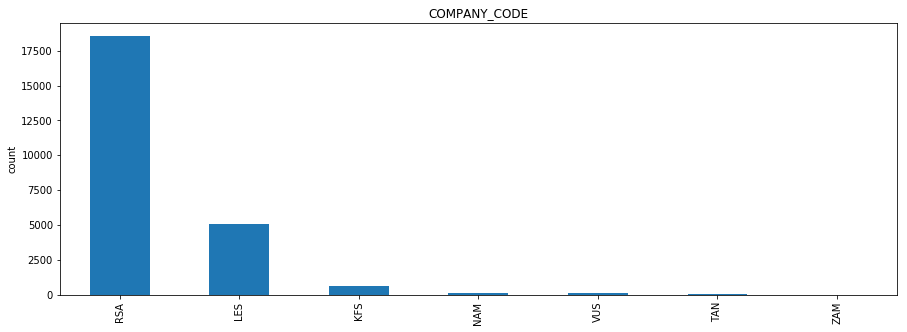

In [10]:
#visualising how COMPANY_CODE distributed 
plt.figure(figsize=(15,5))
data.COMPANY_CODE.value_counts().plot(kind = 'bar')
plt.title('COMPANY_CODE')
plt.ylabel('count')
plt.show()

In [11]:
##checking how the features related to each other 
trading_name_for_company_code = data.groupby(['COMPANY_CODE','CUSTOMER_TRADING_NAME','ACCOUNT_NAME','COST_CENTRE_NAME'])['CUSTOMER_TRADING_NAME'].count()
pd.DataFrame(trading_name_for_company_code)

CUSTOMER_TRADING_NAME
COMPANY_CODE CUSTOMER_TRADING_NAME                ACCOUNT_NAME                                    COST_CENTRE_NAME                                      
KFS          AVIS FLEET SERVICES - KWANE          ZEDA USED CARS                                  USED CARS                                           17
             KWANE FLEET SERVICES (PTY) LTD       ALFRED NZO LOCAL MUNICIPALITY                   ALFRED NZO                                         141
                                                  AMAHLATHI MUNICIPALITY                          AMAHLATHI MUNICIPALITY                              26
                                                  KWANE FLEET SERVICES (PTY) LTD                  KWANE CAPITAL                                       65
                                                  MBHASHE                                         MBHASHE                                             89
                                                  NKONKOBE MUNICIPALITY                           NKONKOBE MUNICIPALITY                               28
                                                  PORT ST JOHNS MUNICIPALITY                      PORT ST JOHNS MUNICIPALITY                          37
                                                  TSANTSABANE LOCAL MUNICIPALITY                  TSANTSABANE                                        259
LES          AVIS FLEET LESOTHO                   AVIS FLEET SERVICES LESOTHO                     LOAN VEHICLE                                        41
                                                                                                  WORKSHOP                                             8
                                                  LOAN VEHICLES                                   LOAN VEHICLE                                        46
             DAILY NEEDS ENTERPRISE PTY LTD       DAILY NEEDS ENTERPRISES PTY LTD                 DAILY NEEDS                                         66
             G4S SECURITY SERVICES (PTY) LTD      G4S CASH SOLUTIONS                              G4S LES CASH                                       205
                                                  G4S SECURE SOLUTIONS                            G4S LESOTHO                                        187
             GLASS WORLD (PTY) LTD                GLASS WORLD (PTY) LTD                           GLASS WORLD                                        200
             GOVERNMENT OF THE KINGDOM OF LESOTHO DEFENCE AND NATIONAL SECURITY - ADMIN           DEFENCE                                              2
                                                  DEFENCE AND NATIONAL SECURITY - NSS             BEREA                                                3
                                                                                                  MAFETENG                                             6
                                                                                                  MASERU                                               2
                                                                                                  N.S.S                                                6
                                                                                                  QACHAS NEK                                           4
                                                  EDUCATION AND TRAINING                          ADMIN                                               14
                                                                                                  T.S.C                                                2
                                                  FORESTRY AND LAND RECLAMATION                   ADMIN                                               14
                                                  LESOTHO MOUNTED POLICE SERVICES                 LESOTHO MOUNTED POLICE SERVICES                      1


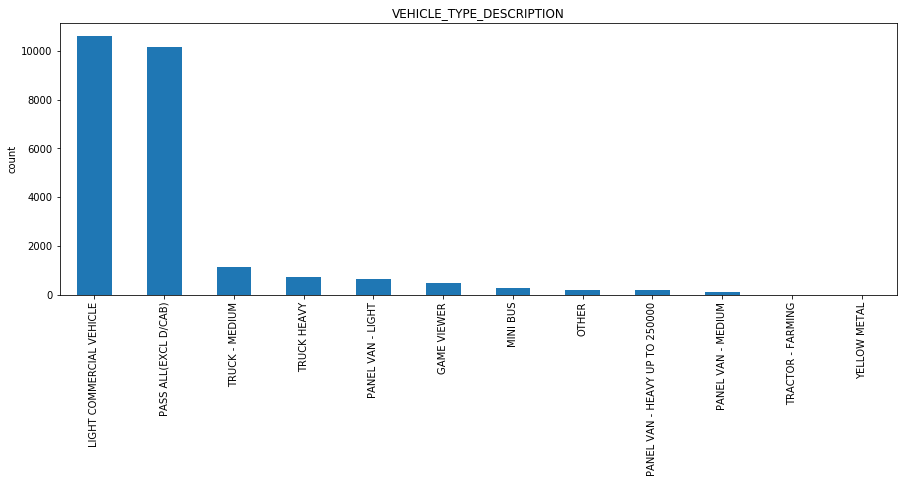

In [12]:
plt.figure(figsize=(15,5))
data.VEHICLE_TYPE_DESCRIPTION.value_counts().plot(kind = 'bar')
plt.title('VEHICLE_TYPE_DESCRIPTION')
plt.ylabel('count')
plt.show()

In [13]:
#getting type and total unique count for feature 
veh_col = ['MAKE_DESCRIPTION', 'RANGE_DESCRIPTION','MODEL_DESCRIPTION', 'ENGINE_CAPACITY', 'FUEL_TYPE', 'FUEL_CONSUMPTION','NUMBER_OF_GEARS', 'VEHICLE_TYPE_DESCRIPTION']
uniq_len = []
type_len = []
for i in veh_col:
    uniq_len.append(len(data[i].unique()))
    type_len.append(data[i].unique())

data_veh = pd.DataFrame({'vehicle_col':veh_col, 'tot_uniq' :uniq_len, 'uniq_val':type_len})
data_veh

,vehicle_col,tot_uniq,uniq_val
0,MAKE_DESCRIPTION,37,"[TOYOTA, ISUZU, MAN, NISSAN, MERCEDES BENZ, IS..."
1,RANGE_DESCRIPTION,167,"[COROLLA, KB, TGM, CLA, TGS, NP200, QUANTUM, H..."
2,MODEL_DESCRIPTION,504,"[1.6 PRESTIGE CVT, 300 D-TEQ LX REGULAR CAB, 1..."
3,ENGINE_CAPACITY,138,"[1598, 2999, 6870, 6871, 12419, 2700, 2694, 63..."
4,FUEL_TYPE,3,"[PETROL, DIESEL, HYBRID]"
5,FUEL_CONSUMPTION,113,"[6.3, 11.03, 35.5, 40.0, 0.0, 8.1, 10.8, 8.4, ..."
6,NUMBER_OF_GEARS,7,"[0.0, nan, 5.0, 7.0, 4.0, 8.0, 6.0]"
7,VEHICLE_TYPE_DESCRIPTION,12,"[PASS ALL(EXCL D/CAB), LIGHT COMMERCIAL VEHICL..."


In [14]:
#getting type and total unique count for feature 
vio_list  = ['MAX_SPEED',
       'NO_OF_HARSH_BRAKES', 'NO_OF_HARSH_ACCELERATION',
       'NO_OF_SPEED_VIOLATIONS', 'NO_EXCESS_IDLE', 'NO_OF_TRIPS', 'RENTAL',
       'FUEL', 'KM_DRIVEN', 'PROJECTED_EXCESS_KM_CHARGE']
tot_uniq = []
uniq_type = []
range_list = []
for i in vio_list:
    tot_uniq.append(len(data[i].unique()))
    uniq_type.append(data[i].unique())
    range_list.append([data[i].min(),data[i].max()])
    

pd.DataFrame({'vio_list':vio_list,'tot_uniq':tot_uniq,'range_list':range_list,'uniq_type':uniq_type})

,vio_list,tot_uniq,range_list,uniq_type
0,MAX_SPEED,232,"[0, 250]","[150, 124, 162, 161, 171, 164, 179, 169, 168, ..."
1,NO_OF_HARSH_BRAKES,306,"[0, 1303]","[20, 5, 4, 26, 25, 28, 34, 18, 0, 3, 1, 161, 6..."
2,NO_OF_HARSH_ACCELERATION,343,"[0, 1394]","[30, 5, 9, 19, 35, 34, 15, 3, 38, 36, 26, 0, 1..."
3,NO_OF_SPEED_VIOLATIONS,1705,"[0, 15990]","[155, 0, 162, 119, 642, 1730, 1114, 398, 1867,..."
4,NO_EXCESS_IDLE,940,"[0, 7088]","[0, 68, 18, 26, 40, 20, 130, 158, 540, 90, 430..."
5,NO_OF_TRIPS,983,"[1, 4359]","[94, 13, 155, 244, 139, 241, 227, 72, 128, 137..."
6,RENTAL,2643,"[-755699.92, 188924.98]","[8763.7, 10428.44, -41713.76, nan, 165.0, 330...."
7,FUEL,7588,"[25.35, 23010.06]","[nan, 2316.53, 2449.76, 1586.02, 878.14, 1418...."
8,KM_DRIVEN,18802,"[0.1, 389264.0]","[971.4639999999999, 68.967, 1124.653, 1416.056..."
9,PROJECTED_EXCESS_KM_CHARGE,606,"[0.0, 292810.52]","[0.0, 32446.23, 12297.54, 44473.31, 5973.6, 17..."


In [15]:
vio_list = ['SPEED_PENALTY_POINTS', 'SPEEDING_TIME', 'SPEEDING_TIME_SECONDS',
       'DRIVING_TIME', 'DRIVING_TIME_SECONDS', 'TM_SCORE']
tot_uniq = []
uniq_type = []
range_list = []
for i in vio_list:
    tot_uniq.append(len(data[i].unique()))
    uniq_type.append(data[i].unique())
    range_list.append([data[i].min(),data[i].max()])
    

pd.DataFrame({'vio_list':vio_list,'tot_uniq':tot_uniq,'range_list':range_list,'uniq_type':uniq_type})

,vio_list,tot_uniq,range_list,uniq_type
0,SPEED_PENALTY_POINTS,2309,"[0, 48673]","[359, 0, 376, 284, 1638, 4444, 2379, 970, 4959..."
1,SPEEDING_TIME,3104,"[00:00.0, 59:58.0]","[40:16.0, 00:00.0, 41:46.0, 31:03.0, 44:04.0, ..."
2,SPEEDING_TIME_SECONDS,5464,"[0, 240782]","[2416, 0, 2506, 1863, 9844, 26144, 16973, 6062..."
3,DRIVING_TIME,903,"[00:00.0, 59:56.0]","[08:48.0, 46:00.0, 41:40.0, 07:12.0, 12:04.0, ..."
4,DRIVING_TIME_SECONDS,20624,"[4, 39465344]","[720528, 9960, 204100, 184032, 220324, 351068,..."
5,TM_SCORE,15245,"[2.800638, 100.0]","[38.26494, 90.0, 55.65427, 46.482929999999996,..."


In [16]:
trading_name_for_company_code = data.groupby(['MAKE_DESCRIPTION','RANGE_DESCRIPTION','MODEL_DESCRIPTION'])['MODEL_DESCRIPTION'].count()
pd.DataFrame(trading_name_for_company_code)

MODEL_DESCRIPTION
MAKE_DESCRIPTION RANGE_DESCRIPTION MODEL_DESCRIPTION                                  
AUDI             A1                1.4 TFSI AMBITION S/TRONIC                       12
                 A1 SPORTBACK      1.0 TFSI S S/TRONIC                               6
                 A3                1.4 TFSI S 3DR                                   12
                 A3 SPORTBACK      1.4 TFSI S 5DR S/TRONIC                          20
                                   1.8 TFSI SE 132KW 5DR S/TRONIC                   15
                 A4                1.8 TFSI S 125KW                                 10
                                   1.8 TFSI S 125KW M/TRONIC                        35
                                   1.8T ATTRACTION MULTITRONIC(B8)                   8
                                   2.0 TDI ALLROAD QUATTRO S/T                      13
                                   2.0 TDI MULTI                                    12
                                   2.0 TDI S 130KW M/TRONIC                         34
                 Q5                2.0 TDI S QUATTRO S/TRONIC                        2
BMW              1 SERIES          116I F20 STD 5DR AUTO                             4
                                   118I F20 STD 5DR AUTO                            13
                 2 SERIES          220I F22 M SPORT S/T                             10
                 3 SERIES          320I F30 M SPORT S/T                              3
                                   320I F30 STD S/T                                  8
                                   340I F30 LUXURY LINE S/T                          5
                                   340I F30 M SPORT S/T                              6
                 4 SERIES          420I F32 M SPORT S/T                              4
                                   435I F32 M SPORT S/T                              5
                                   440I F32 LUXURY LINE S/T                          4
                 X1                2.0D SDRIVE20D STD S/T                           13
                 X3                2.0D XDRIVE20D A/T F25                            8
                                   3.0D XDRIVE30D A/T F25                            5
                                   3.0D XDRIVE30D M-SPORT A/T F25                   15
                 X4                2.8I XDRIVE28I F26 M-SPORT S/T                    8
                                   3.0D XDRIVE30D F26 M-SPORT S/T                    6
                                   3.0D XDRIVE30D F26 XLINE S/T                     10
                 X5                3.0D M50D                                         6
...                                                                                ...
VOLKSWAGEN       POLO              5 1.5 TDI COMFORTLINE SEDAN                       6
                                   5 1.6 COMFORTLINE (10)                           12
                                   5 1.6 COMFORTLINE SEDAN                          32
                                   5 1.6 COMFORTLINE SEDAN TIP                      53
                                   5 1.6 COMFORTLINE TIP (10)                        8
                                   5 1.6 TDI COMFORTLINE (10)                        6
                                   5 1.6 TRENDLINE (10)                              8
                                   5 1.8 TSI GTI                                    14
                 POLO VIVO         1.4I BASE (10)                                    3
                                   1.4I BASE AIRCON (10)                            16
                                   1.4I BLUELINE                                    39
                                   1.4I CONCEPTLINE                                301
                                   1.4I STREET                                       7
                                   1.4I TRENDLINE                  

### DATA CLEANING AND ENGINEERING 

In [17]:
#remove SPEEDING_TIME, as we have column for total second
data.drop(['SPEEDING_TIME'],axis = 1,inplace=True)

In [18]:
#CONVERTING Driving time into seconds
data['DRIVING_TIME']=pd.to_datetime(data['DRIVING_TIME'], format='%M:%S.%f')
minute = []
second = []
for i in range(len(data)):
    minute.append(data['DRIVING_TIME'][i].minute*60)
    second.append(data['DRIVING_TIME'][i].second)

tot_sec = np.add(minute, second)
data['DRIVING_TIME'] = tot_sec

#changing the column name DRIVING_TIME_SECONDS to total_time_driven
data=data.rename(columns = {'DRIVING_TIME_SECONDS':'total_time_driven'})

In [19]:
len(data[data.total_time_driven<data.DRIVING_TIME])

0

In [20]:
#filling na for number of gears by grouping model_description and make_description and replacing it with max gear for that group ?
data['NUMBER_OF_GEARS']=data.groupby(['MODEL_DESCRIPTION'])['NUMBER_OF_GEARS'].transform(lambda x: x.fillna(x.mean()))
data['NUMBER_OF_GEARS']=data.groupby(['MAKE_DESCRIPTION'])['NUMBER_OF_GEARS'].transform(lambda x: x.fillna(x.mean()))

In [21]:
##remaining number of gear we would cluster by average of total number of gear 

data['NUMBER_OF_GEARS'] = data['NUMBER_OF_GEARS'].fillna(np.round((data['NUMBER_OF_GEARS'].mean())))

In [22]:
## filling rental na values by imputing with the average value of grouping feature 
data['RENTAL']=data.groupby(['COMPANY_CODE','CUSTOMER_TRADING_NAME','ACCOUNT_NAME','COST_CENTRE_NAME','MAKE_DESCRIPTION'])['RENTAL'].transform(lambda x: x.fillna(x.mean()))

data['RENTAL']=data.groupby(['COMPANY_CODE','CUSTOMER_TRADING_NAME','ACCOUNT_NAME','COST_CENTRE_NAME'])['RENTAL'].transform(lambda x: x.fillna(x.mean()))

data['RENTAL']=data.groupby(['COMPANY_CODE','CUSTOMER_TRADING_NAME','ACCOUNT_NAME'])['RENTAL'].transform(lambda x: x.fillna(x.mean()))

data['RENTAL']=data.groupby(['COMPANY_CODE','CUSTOMER_TRADING_NAME'])['RENTAL'].transform(lambda x: x.fillna(x.mean()))

data['RENTAL']=data.groupby(['COMPANY_CODE'])['RENTAL'].transform(lambda x: x.fillna(x.mean()))

data['RENTAL']=data.groupby(['MAKE_DESCRIPTION'])['RENTAL'].transform(lambda x: x.fillna(x.mean()))

data['RENTAL'].fillna(0, inplace = True)

In [23]:
## removing the column fuel
data.drop(['FUEL'],axis = 1,inplace=True)

In [24]:
data['Num_times_yawned'] = data['Num_times_yawned'].fillna((data['Num_times_yawned'].mean()))

In [25]:
data['Num_times_Angry'] = data['Num_times_Angry'].fillna((data['Num_times_Angry'].mean()))

In [26]:
data['Num_times_sleepy'] = data['Num_times_sleepy'].fillna((data['Num_times_sleepy'].mean()))

In [27]:
##performing linear regression to predict value to fill TM score :
##using following feature 
##NO_OF_HARSH_BRAKES	NO_OF_HARSH_ACCELERATION	NO_OF_SPEED_VIOLATIONS	NO_EXCESS_IDLE	NO_OF_TRIPS
data_new = data[['MAX_SPEED',
       'NO_OF_HARSH_BRAKES', 'NO_OF_HARSH_ACCELERATION',
       'NO_OF_SPEED_VIOLATIONS', 'NO_EXCESS_IDLE', 'NO_OF_TRIPS','TM_SCORE']]

data_new1 = data_new.copy()

data_na = data_new1[np.isnan(data_new1.TM_SCORE)==True]
data_complete = data_new1[np.isnan(data_new1.TM_SCORE)==False]
X = data_complete.drop(['TM_SCORE'],axis = 1)
y = data_complete['TM_SCORE']

X_na = data_na.drop(['TM_SCORE'],axis = 1)
y_na = data_na['TM_SCORE']

reg = linear_model.LinearRegression()
reg.fit(X, y) 

predict_result = reg.predict(X_na)

data_na_new  = X_na
data_na_new['TM_SCORE'] = predict_result

data_complete = data_complete.append(data_na_new)

In [28]:
data.drop(['MAX_SPEED',
       'NO_OF_HARSH_BRAKES', 'NO_OF_HARSH_ACCELERATION',
       'NO_OF_SPEED_VIOLATIONS', 'NO_EXCESS_IDLE', 'NO_OF_TRIPS','TM_SCORE'],axis = 1,  inplace = True)

data_final = pd.concat([data_complete,data ],axis = 1 )

In [29]:
## considering only VEHICLE_TYPE_DESCRIPTION instead of 
#MAKE_DESCRIPTION, RANGE_DESCRIPTION, MODEL_DESCRIPTION
data_final.drop(['MAKE_DESCRIPTION', 'RANGE_DESCRIPTION', 'MODEL_DESCRIPTION'], axis=1, inplace = True)

In [30]:
##remove MONTH_KEY	INSTALLATION_DATE	DUE_TO_TERM
data_final.drop(['MONTH_KEY','INSTALLATION_DATE','DUE_TO_TERM'], axis=1, inplace = True)

In [31]:
## removing CUSTOMER_TRADING_NAME	ACCOUNT_NAME	COST_CENTRE_NAME and keeping COMPANY_CODE
data_final.drop(['CUSTOMER_TRADING_NAME','ACCOUNT_NAME','COST_CENTRE_NAME'], axis=1, inplace = True)

In [32]:
## bin following categor as other 
##GAME VIEWER, MINI BUS, OTHER, PANEL VAN - HEAVY UP TO 250000, PANEL VAN - LIGHT, PANEL VAN - MEDIUM,
##TRACTOR - FARMING,TRUCK HEAVY, YELLOW METAL
vehicle_type_list = ['GAME VIEWER','MINI BUS','OTHER','PANEL VAN - HEAVY UP TO 250000','PANEL VAN - LIGHT',
'PANEL VAN - MEDIUM','TRACTOR - FARMING','TRUCK - MEDIUM','TRUCK HEAVY','YELLOW METAL']

for i in range(len(data_final)):
    if (data_final.loc[i,'VEHICLE_TYPE_DESCRIPTION'] in vehicle_type_list):
        data_final.loc[0,'VEHICLE_TYPE_DESCRIPTION'] = 'Other'

In [33]:
data_final.to_csv('/Users/sk250120/Documents/practice_python_code/Final_code/clean_data_telematic.csv', index = False)

### CLUSTERING AND LABELLING 

In [34]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from scipy.stats import zscore
from sklearn.cluster import KMeans
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style

In [35]:
#Standerdizing the numerical feature
numeric_cols = data_final.select_dtypes(include=[np.number]).columns
data2 = data_final[numeric_cols].apply(zscore)

In [36]:
#Setting for plot 
style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

In [37]:
syms1 = np.array(data2['TM_DRIVERID'])

In [38]:
X1 = np.array(data2.iloc[:,1:])

In [39]:
kproto1 = KPrototypes(n_clusters=5, init='Cao', verbose=2)
clusters1 = kproto1.fit_predict(X1, categorical=[0,1,2,3,4])

Initialization method and algorithm are deterministic. Setting n_init to 1.


/Users/sk250120/anaconda3/lib/python3.6/site-packages/kmodes/util/__init__.py:70: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.vstack({tuple(row) for row in a})


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 6978, ncost: 310536.78892038274
Run: 1, iteration: 2/100, moves: 2678, ncost: 303488.82066160964
Run: 1, iteration: 3/100, moves: 2328, ncost: 297788.09966158506
Run: 1, iteration: 4/100, moves: 1950, ncost: 293216.6864642795
Run: 1, iteration: 5/100, moves: 928, ncost: 291395.23214550037
Run: 1, iteration: 6/100, moves: 410, ncost: 290692.85104340647
Run: 1, iteration: 7/100, moves: 176, ncost: 290341.2827154791
Run: 1, iteration: 8/100, moves: 122, ncost: 290241.6313823501
Run: 1, iteration: 9/100, moves: 68, ncost: 290191.27461932367
Run: 1, iteration: 10/100, moves: 30, ncost: 290179.99294459977
Run: 1, iteration: 11/100, moves: 20, ncost: 290176.89299896226
Run: 1, iteration: 12/100, moves: 4, ncost: 290176.6702312638
Run: 1, iteration: 13/100, moves: 1, ncost: 290176.6695261994
Run: 1, iteration: 14/100, moves: 0, ncost: 290176.6695261994


In [40]:
## Adding the cluster column to the original data which will act as the label for the data 
df = pd.DataFrame(clusters1)
df.columns = ['cluster']
print(df.groupby(['cluster']).size())
data_final['cluster'] = df['cluster']

cluster
0     1970
1      368
2    14467
3     7408
4      323
dtype: int64


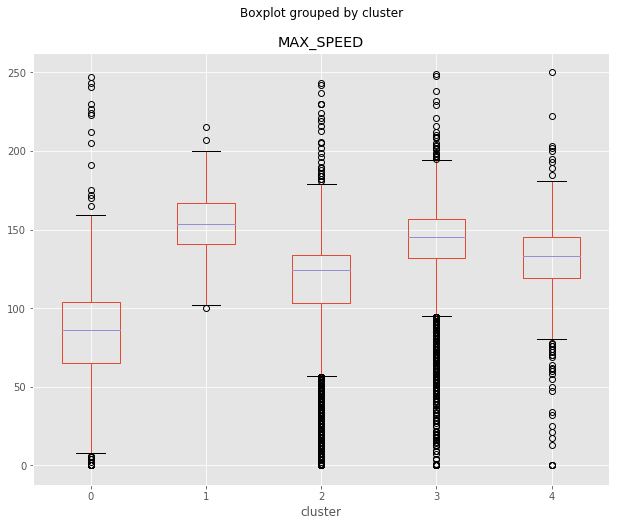

In [41]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('MAX_SPEED By Cluster')
data_final.boxplot(column=['MAX_SPEED'],by='cluster',ax=ax)

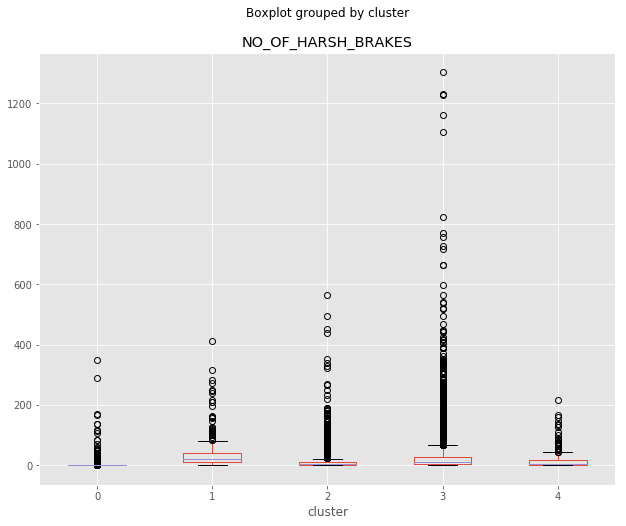

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
data_final.boxplot(column=['NO_OF_HARSH_BRAKES'],by='cluster',ax=ax)

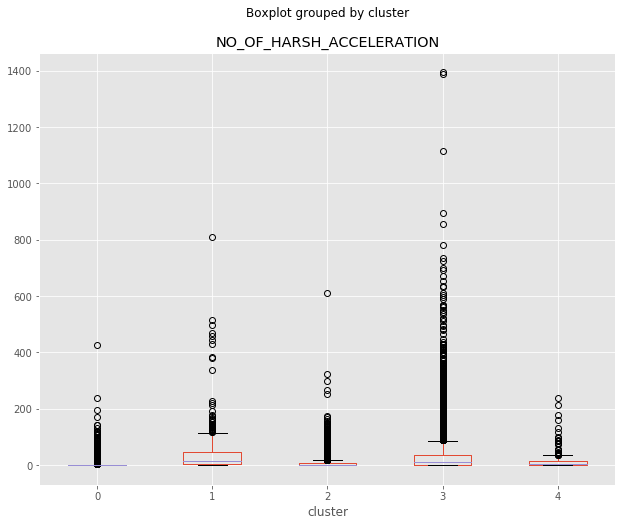

In [43]:
fig, ax = plt.subplots(figsize=(10,8))
data_final.boxplot(column=['NO_OF_HARSH_ACCELERATION'],by='cluster',ax=ax)

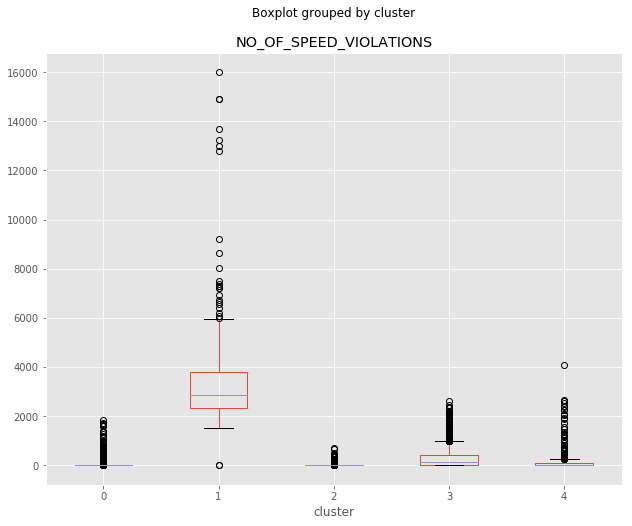

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
data_final.boxplot(column=['NO_OF_SPEED_VIOLATIONS'],by='cluster',ax=ax)

In [45]:
inf = data_final.groupby('cluster').agg(['min','mean', 'max'])
inf.to_csv('jminfo2.csv', sep=',')

In [46]:
data_final.to_csv('/Users/sk250120/Documents/practice_python_code/Final_code/data_with_cluster.csv',sep=',', index = False)

### BUILDING CLASSIFICATION MODEL

In [47]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
file = '/Users/sk250120/Documents/practice_python_code/Final_code/data_with_cluster.csv'
data_neww = pd.read_csv(file)

In [49]:
data_neww.rename({'cluster':'target'}, axis = 1, inplace = True )
data_neww = data_neww.drop(['PRODUCT_CODE' , 'TM_REGISTRATION_NUMBER','TM_DRIVERID'],axis =1)
column_names_for_onehot = data_neww.select_dtypes(include=[object]).columns
column_names_for_onehot = ['COMPANY_CODE', 'VEHICLE_TYPE_DESCRIPTION', 'FUEL_TYPE']
dataa1 = pd.get_dummies(data_neww, columns=column_names_for_onehot, drop_first=True)

In [50]:
X = dataa1[dataa1.columns.difference(['target'])]
Y = dataa1['target']

In [51]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,stratify=Y)

In [52]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(17175, 40) (7361, 40) (17175,) (7361,)


In [53]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [54]:
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=6)
    cv_result = model_selection.cross_val_score(model,X_train,y_train, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

/Users/sk250120/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/sk250120/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/sk250120/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/sk250120/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/sk250120/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/sk250120/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.w

LR 0.9230870071815159
LDA 0.9633189185556518
KNN 0.7539447202184975
CART 0.9792723600522959
NB 0.828180703236446
SVM 0.5896365949686674


In [55]:
## from the above result we can see that LDA performed the best, hence we are fitting our data on LDA and validating on 
## test data
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train,y_train)


/Users/sk250120/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [73]:
y_pred = model_lda.predict(X_test)
print('F1 score:',metrics.f1_score(y_test, y_pred,average = 'macro'))

F1 score: 0.9528413104704019
